## Partículas a una malla
## Implementación en Python 
### José Alberto Moreno Guerra

In [1]:
from mpl_toolkits import mplot3d
import numpy as np
import scipy.stats as st
from random import random
import matplotlib.pyplot as plt
import math 
from IPython.display import display
from IPython.core.pylabtools import figsize, getfigs
plt.style.use('classic')
%matplotlib inline

In [2]:
global vtx, vty, c1, c2
vtx = []
vty = []
c1 = []
c2 = []
def anillos(R,r,n,i):
    tcx=np.zeros(n)
    tcy=np.zeros(n)
    tcz=np.zeros(n)
    np.random.seed(i)
    centro1=(random()-0.5)*1000.0
    centro2=(random()-0.5)*1000.0
    for i in range(n):
        alpha=np.random.uniform(0, 2.*np.pi)
        beta=np.random.uniform(0, 2.*np.pi)
        x2=(R+r*math.cos(alpha))*math.cos(beta)-centro1
        y2=(R+r*math.cos(alpha))*math.sin(beta)-centro2
        z2=r*math.sin(alpha)
        tcx[i]=x2
        tcy[i]=y2
        vtx.append(tcx[i])
        vty.append(tcy[i])
        c1.append(centro1)
        c2.append(centro2)
        tcz[i]=z2
    plt.plot(tcx,tcy, 'b.')
    circle = plt.Circle((-centro1, -centro2), (R-r)-10.0, color='r', fill=False)
    plt.gcf().gca().add_artist(circle)
    circle = plt.Circle((-centro1, -centro2), (R+r)+10.0, color='r', fill=False)
    plt.gcf().gca().add_artist(circle)

### Generamos varias distribuciones de puntos, una aleatoria 

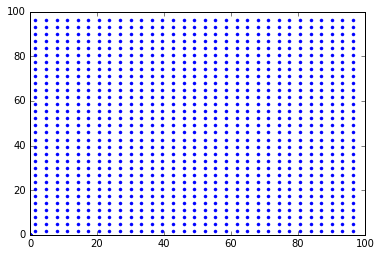

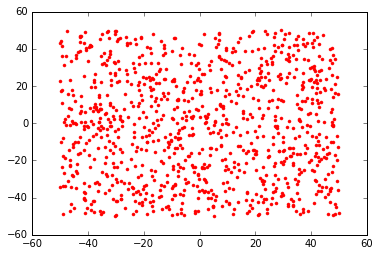

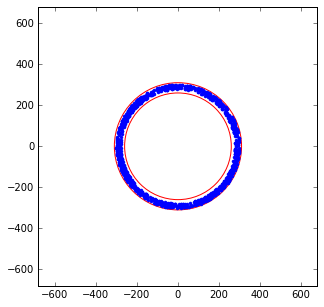

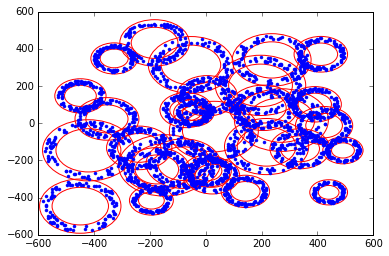

In [3]:
n=1000
rho=0.1
dim=np.sqrt(n/rho)
d=dim/np.sqrt(n)
x=np.zeros(n)
y=np.zeros(n)
radx=[]
rady=[]
k=0
for i in range(int(dim/d)):
    for j in range(int(dim/d)):   
        x[k]=(d/2)+d*i
        y[k]=(d/2)+d*j
        k=k+1
for i in range(n):
    radx.append((random()-0.5)*dim)
    rady.append((random()-0.5)*dim)
plt.plot(x,y, 'b.')
plt.axis([0.0, dim, 0.0, dim]) 
plt.show()
plt.plot(radx,rady, 'r.')
plt.show()

R=290.0
r=10.0
tx=np.zeros(n)
ty=np.zeros(n)
tz=np.zeros(n)
for i in range(n):
    alpha=np.random.uniform(0, 2.*np.pi)
    beta=np.random.uniform(0, 2.*np.pi)
    x2=(R+r*math.cos(alpha))*math.cos(beta)
    y2=(R+r*math.cos(alpha))*math.sin(beta)
    z2=r*math.sin(alpha)
    tx[i]=x2
    ty[i]=y2
    tz[i]=z2
plt.figure(figsize=(5,5))
plt.plot(tx,ty, 'b.')
circle = plt.Circle((0, 0), 260, color='r', fill=False)
plt.gcf().gca().add_artist(circle)
circle = plt.Circle((0, 0), 310, color='r', fill=False)
plt.gcf().gca().add_artist(circle)
plt.axis([-(2*R+100), (2*R+100), -(2*R+100), (2*R+100)]) 
plt.show()

for i in range(30):
    np.random.seed(i)
    z=(1-(random()-0.5))*100
    c=z/10.0
    anillos(z,c,100,i)
plt.figure(figsize=(15,15))
plt.show()

## De un anillo a una malla

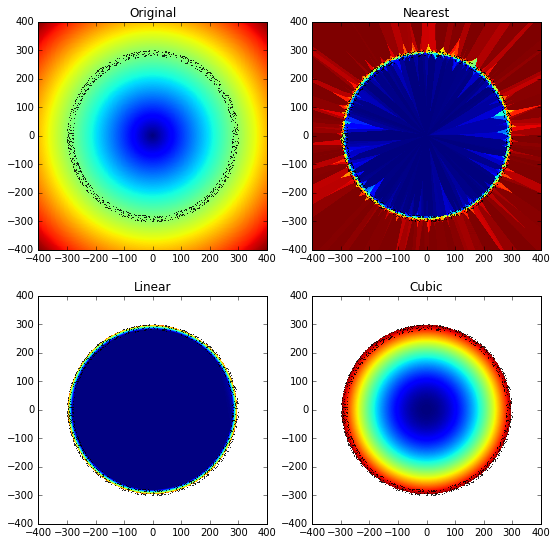

In [4]:
from scipy.interpolate import griddata

def func(x, y):
    return (x**2 + y**2)/np.sqrt(x**2 + y**2)

grid_x, grid_y = np.mgrid[-400:400:1000j, -400:400:1000j]
values = func(tx, ty)
points = (tx, ty)

grid_z1 = griddata(points,values,(grid_x, grid_y),method='linear')
grid_z2 = griddata(points,values,(grid_x, grid_y),method='nearest')
grid_z3 = griddata(points,values,(grid_x, grid_y),method='cubic')

plt.subplot(221)
plt.imshow(func(grid_x, grid_y).T, extent=(-400,400,-400,400), origin='lower')
plt.plot(tx, ty, 'k.', ms=1)
plt.title('Original')
plt.subplot(222)
plt.imshow(grid_z2, extent=(-400,400,-400,400), origin='lower')
plt.plot(tx, ty, 'k.', ms=1)
plt.title('Nearest')
plt.subplot(223)
plt.imshow(grid_z1, extent=(-400,400,-400,400), origin='lower')
plt.plot(tx, ty, 'k.', ms=1)
plt.title('Linear')
plt.subplot(224)
plt.imshow(grid_z3, extent=(-400,400,-400,400), origin='lower')
plt.plot(tx, ty, 'k.', ms=1)
plt.title('Cubic')
plt.gcf().set_size_inches(9, 9)
plt.show()

## Varios anillos a una malla

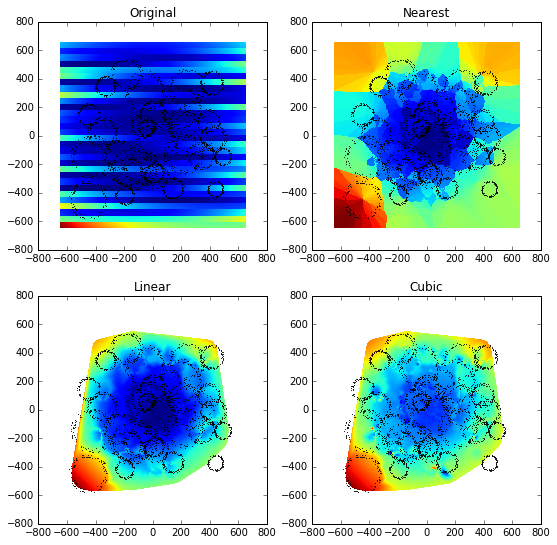

In [5]:
tx = np.array(vtx)
ty = np.array(vty)
c1 = np.array(c1)
c2 = np.array(c2)

def func(x, y):
    return ((x-c1)**2 + (y-c2)**2)

grid_x, grid_y = np.mgrid[-650:650:3000j, -650:650:3000j]
values = func(tx, ty)
points = (tx, ty)

grid_z1 = griddata(points,values,(grid_x, grid_y),method='linear')
grid_z2 = griddata(points,values,(grid_x, grid_y),method='nearest')
grid_z3 = griddata(points,values,(grid_x, grid_y),method='cubic')

plt.subplot(221)
plt.imshow(func(grid_x, grid_y).T, extent=(-650,650,-650,650), origin='lower')
plt.plot(tx, ty, 'k.', ms=1)
plt.title('Original')
plt.subplot(222)
plt.imshow(grid_z2, extent=(-650,650,-650,650), origin='lower')
plt.plot(tx, ty, 'k.', ms=1)
plt.title('Nearest')
plt.subplot(223)
plt.imshow(grid_z1, extent=(-650,650,-650,650), origin='lower')
plt.plot(tx, ty, 'k.', ms=1)
plt.title('Linear')
plt.subplot(224)
plt.imshow(grid_z3, extent=(-650,650,-650,650), origin='lower')
plt.plot(tx, ty, 'k.', ms=1)
plt.title('Cubic')
plt.gcf().set_size_inches(9, 9)
plt.show()